# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
from pydotplus import graph_from_dot_data

# Obtain Data

In [6]:
cancerdata = pd.read_csv('shared/datasets/cancer.csv')
cancerdata.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [7]:
# Extract all "features" ---> label as "X"
# Let the class be "Y"

X = cancerdata.iloc[ :  ,  1:10  ]
Y = cancerdata['Class']


# Construct training & testing dataset

In [19]:
# Split data into training and testing datasets with sklearn's built-in function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .5, random_state = 1)

In [9]:
# Create a full training set by concatenating the X_train and Y_train matrices together
# This code is available from the lecture slides
training_data = pd.concat( [ X_train, y_train ], axis = 1 )

# Attribute Selection

In [10]:
# Attribute selection
# Select 2 attributes
#Two attributes: 
s1 = "Clump Thickness" 
s2 = "Uniformity of Cell Shape"

<AxesSubplot: xlabel='Clump Thickness', ylabel='Uniformity of Cell Shape'>

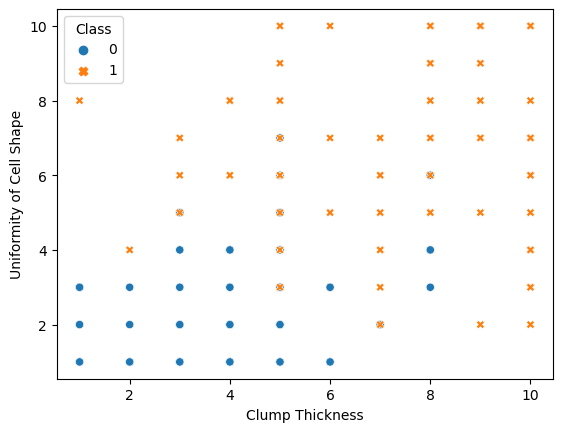

In [11]:
sns.scatterplot(training_data, x="Clump Thickness", y="Uniformity of Cell Shape",style = 'Class', hue = 'Class')

# Decision Tree Design

Using boolean algebra/expressions and conditional statements, design your own decision tree.

In [16]:
def my_decision_tree(uniformity_of_cell_shape, clump_thickness):
 if (uniformity_of_cell_shape > 4 ): 
    class_predicted = 1
 elif(clump_thickness > 3 ):
    class_predicted = 1
 else:
    class_predicted = 0
    
    print(class_predicted)

Calculate the accuracy of your decision tree

Hint: 

Run your decision tree with your test data - let this be "y_predicted"

Use a for loop to loop through each sample in the testing dataset. Use each sample as a parameter for your decision tree. Save the predicted results in a list.

Compare your "y_predicted" results to your y_test results - how many did your decision tree get correct?

You can use the 'accuracy_score' function from sklearn

Or you can divide the number of samples your classifier got correct by the total number of samples in y_predicted (y_test and y_predicted should have the same number of samples)

In [92]:
y_predicted = []

for i in range(len(X_test)):
    uniformity_of_cell_shape = X_test.iloc[i]['Uniformity of Cell Shape']
    clump_thickness = X_test.iloc[i]['Clump Thickness']
    
    if (uniformity_of_cell_shape > 4): 
        y_predicted.append(1)
    elif (clump_thickness > 3):
        y_predicted.append(1)
    else:
        y_predicted.append(0)

print("Accuracy:", accuracy_score(y_test, y_predicted))

Accuracy: 0.7134502923976608


Create a decision tree object (using scikit-learn) with the same depth as your custom decision tree you made above. 

Train the decision tree, find the accuracy of it, and display the decision tree.

How does your decision tree compare to the decision tree with scikit-learn?

In [21]:
clf1 = DTC()
clf1 = clf1.fit(X_train[['Uniformity of Cell Shape', 'Clump Thickness']],y_train)
y_pred1 = clf1.predict(X_test[['Uniformity of Cell Shape', 'Clump Thickness']])
print("Accuracy:",accuracy_score(y_test, y_pred1))

Accuracy: 0.9152046783625731


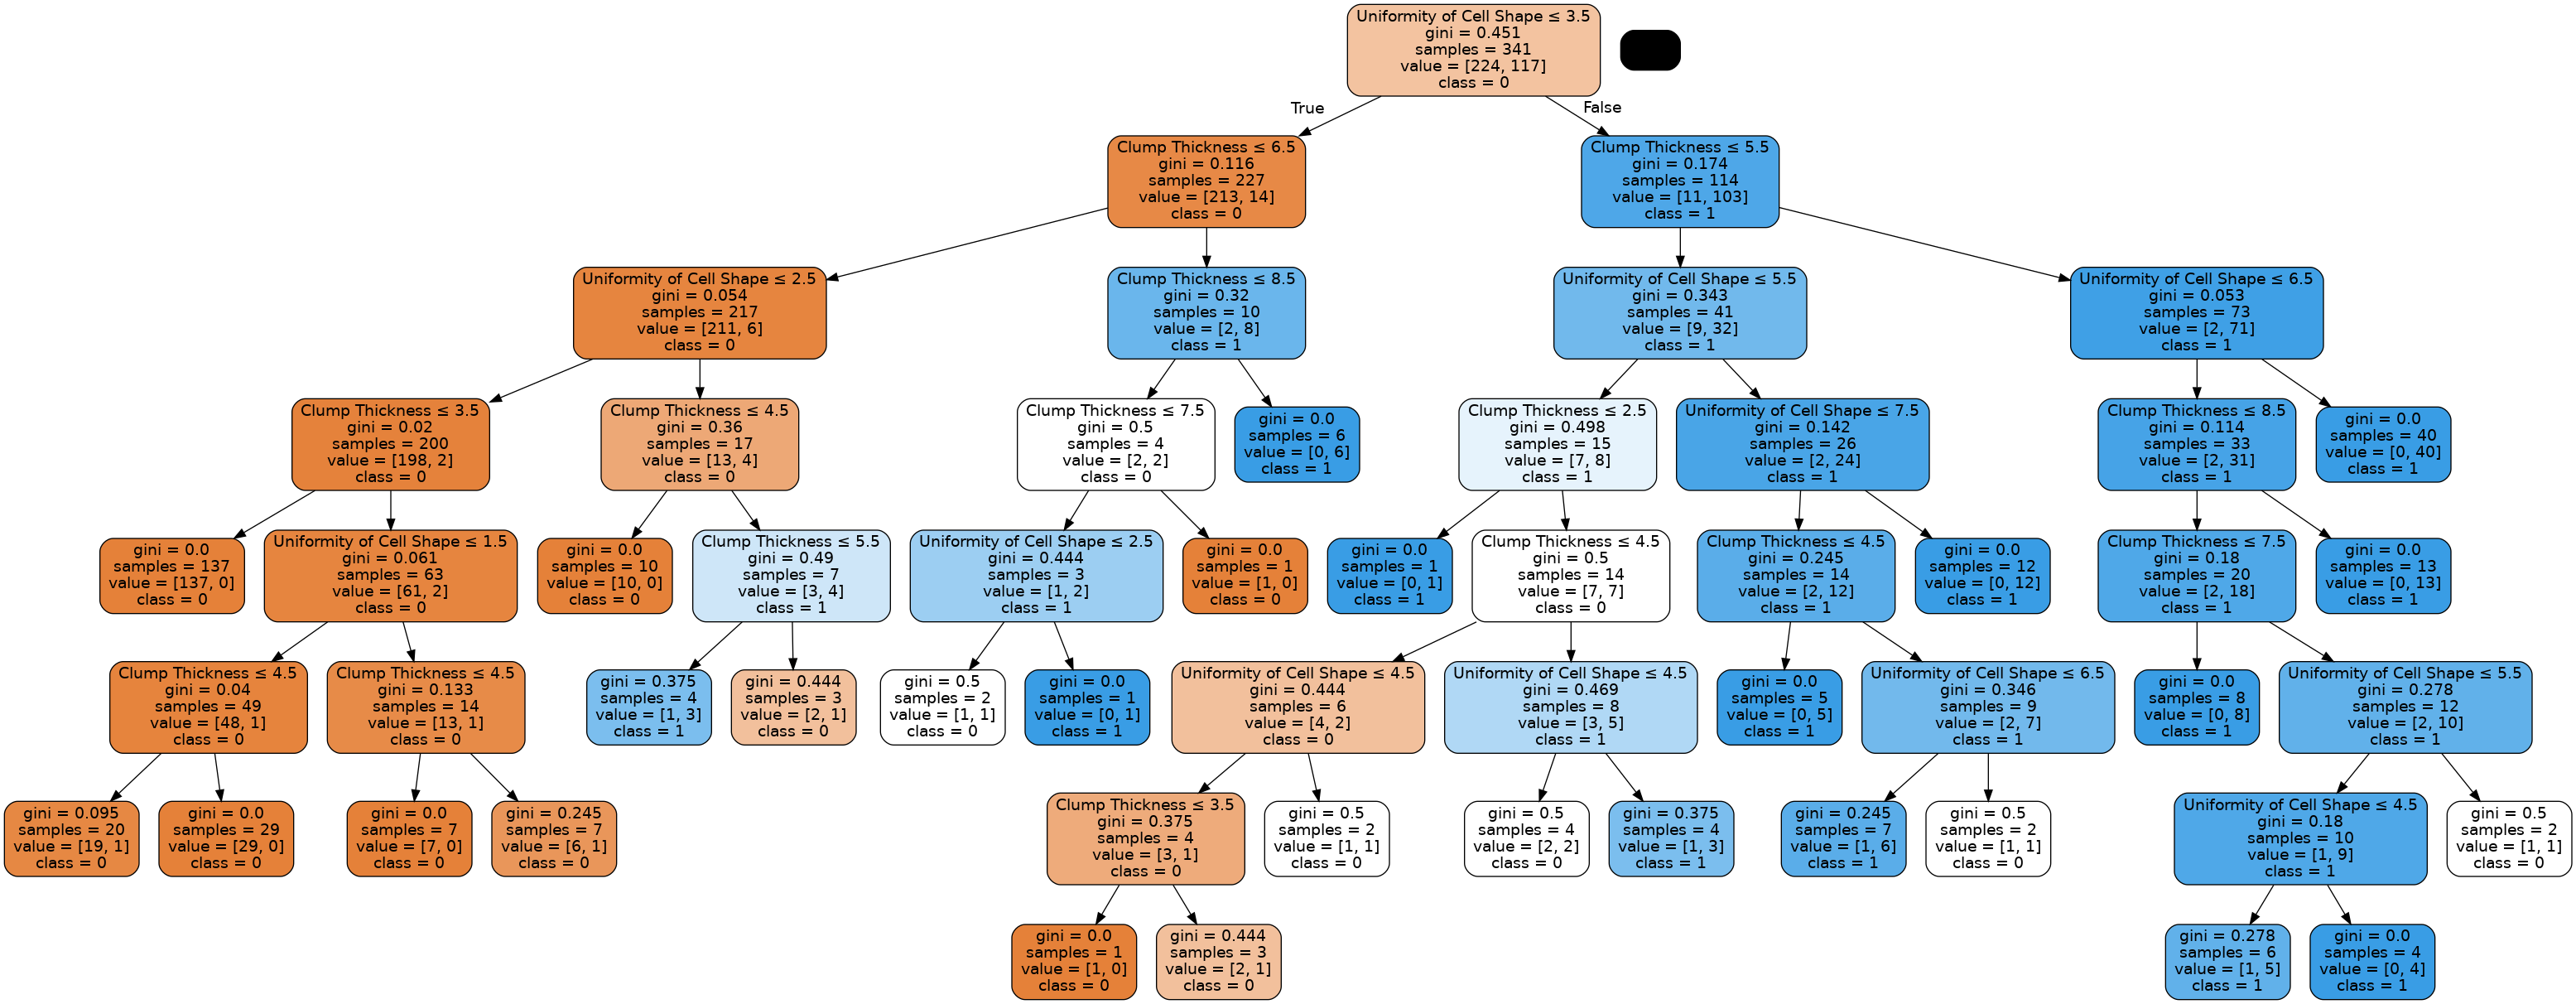

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True,feature_names = [s1,s2],class_names=['0','1'])
graph = graph_from_dot_data(dot_data.getvalue())
graph.write_png('c.png')
Image(graph.create_png())

In [7]:
#My decision tree was signficantly less accurate than the one made by scikit-learn, as demonstrated by the disparity in accuracy. 